# Power iteration convergence

In [1]:
using FundamentalsNumericalComputation

We will experiment with the power iteration on a 5×5 matrix with prescribed eigenvalues and dominant eigenvalue at 1.

In [2]:
λ = [1,-0.75,0.6,-0.4,0]
A = triu(ones(5,5),1) + diagm(λ)   # triangular matrix, eigvals on diagonal

5×5 Matrix{Float64}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

We run the power iteration 60 times. The best estimate of the dominant eigenvalue is the last entry of gamma.

In [3]:
γ,x = FNC.poweriter(A,60)
eigval = γ[end]

0.9999999996989869

We check for linear convergence using a log-linear plot of the error.

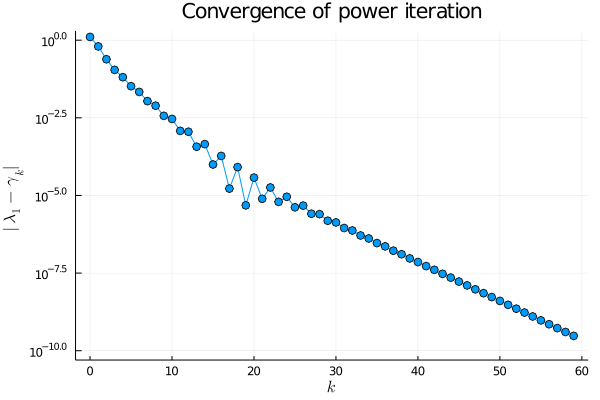

In [4]:
err = @. 1 - γ
plot(0:59,abs.(err),m=:o,label="", 
    title="Convergence of power iteration",
    xlabel=L"k",yaxis=(L"|\lambda_1 - \gamma_k|",:log10,[1e-10,1]) )

The asymptotic trend seems to be a straight line, consistent with linear convergence. To estimate the convergence rate, we look at the ratio of two consecutive errors in the linear part of the convergence curve.We can get a refined estimate of the error reduction in each step by using the exact eigenvalues.

In [5]:
@show theory = λ[2]/λ[1];
@show observed = err[40]/err[39];

theory = λ[2] / λ[1] = -0.75
observed = err[40] / err[39] = -0.7338602675726771


Note that the error is supposed to change sign on each iteration. An effect of these alternating signs is that estimates oscillate around the exact value.

In [6]:
γ[26:30]

5-element Vector{Float64}:
 0.9999958448026157
 1.0000046994807303
 0.999997425243398
 1.00000250097632
 0.9999984662139337

In practical situations, we don't know the exact eigenvalue that the algorithm is supposed to find. In that case we would base errors on the final $\gamma$ that was found, as in the following plot.

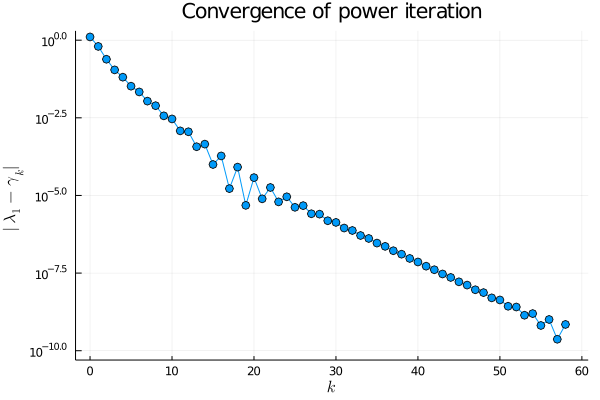

In [7]:
err = @. γ[end] - γ
plot(0:59,abs.(err),m=:o,label="", 
    title="Convergence of power iteration",
    xlabel=L"k",yaxis=(L"|\lambda_1 - \gamma_k|",:log10,[1e-10,1]) )

The results are very similar until the last few iterations, when the limited accuracy of the "exact" value begins to show. That is, while it is a good estimate of $\lambda_1$, it is less good as an estimate of the *error* in nearby estimates.